In [ ]:
# Uninstall TensorFlow if already installed
!pip uninstall -y tensorflow

# Install TensorFlow again
!pip install tensorflow

# Restart runtime to apply changes




  Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (601.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.17.0 which is incompatible.


In [ ]:
!pip install --upgrade tensorflow

In [ ]:
!pip install scikeras[tensorflow]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 95.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import tensorflow as tf

# Verify TensorFlow version
print("TensorFlow version:", tf.__version__)

# Import Keras submodules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Print success message if imports work
print("Keras imports successful!")


TensorFlow version: 2.17.0
Keras imports successful!


In [ ]:
# Import TensorFlow and Keras modules
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

print("TensorFlow version:", tf.__version__)

# Example model to verify the imports
model = Sequential([
    LSTM(10, input_shape=(5, 1)),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy')
print(model.summary())


TensorFlow version: 2.17.0


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10)                  │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 491 (1.92 KB)

 Trainable params: 491 (1.92 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import random

In [ ]:
# define needed columns
desired_columns=["timestamp", "avg cpu"]
new_column_names = {"timestamp": "time", "avg cpu": "avg_cpu"}

#read the csv file and then specify the desired columns
df=pd.read_csv("cpu_util.csv", usecols=desired_columns, parse_dates=["timestamp"])

#rename columns to new names
df=df.rename(columns=new_column_names)

#set the time column to index and make it into period
df['time'] = pd.to_datetime(df['time'], infer_datetime_format=True)
df=df.set_index("time")

<ipython-input-2-d89af7c8c5f6>:12: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['time'] = pd.to_datetime(df['time'], infer_datetime_format=True)


In [ ]:
df.head()

,avg_cpu
time,
2017-01-01 00:00:00,1.229569e+06
2017-01-01 00:05:00,1.211322e+06
2017-01-01 00:10:00,1.206635e+06
2017-01-01 00:15:00,1.190369e+06
2017-01-01 00:20:00,1.180992e+06


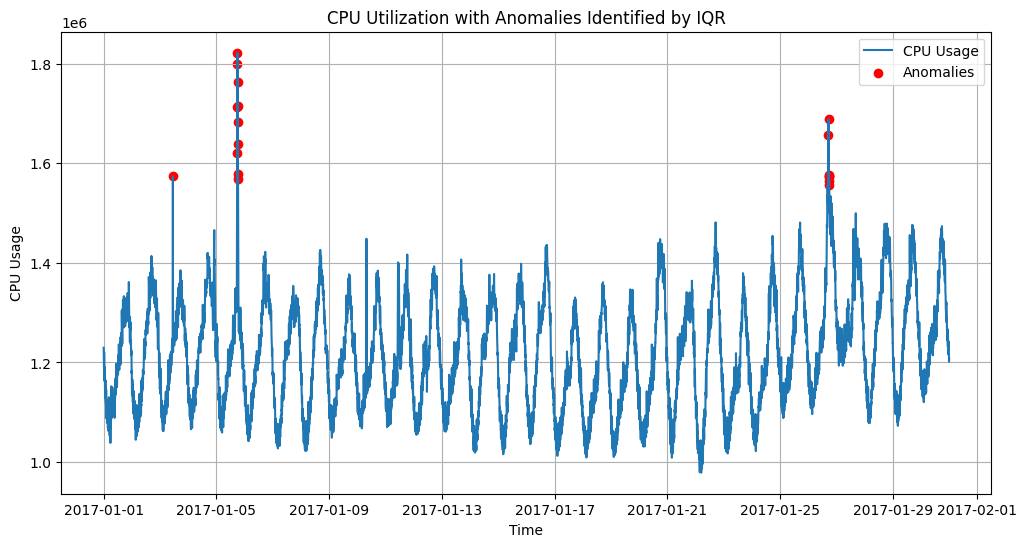

In [ ]:
# Calculate IQR
Q1 = df['avg_cpu'].quantile(0.25)
Q3 = df['avg_cpu'].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold to identify anomalies (e.g., 1.5 * IQR)
iqr_threshold = 1.5
lower_bound = Q1 - iqr_threshold * IQR
upper_bound = Q3 + iqr_threshold * IQR
anomalies_iqr = df[(df['avg_cpu'] < lower_bound) | (df['avg_cpu'] > upper_bound)]

# Mark anomalies
df['anomaly'] = (df['avg_cpu'] < lower_bound) | (df['avg_cpu'] > upper_bound)

# Plot the anomalies
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['avg_cpu'], label='CPU Usage')
plt.scatter(anomalies_iqr.index, anomalies_iqr['avg_cpu'], color='red', label='Anomalies')
plt.title('CPU Utilization with Anomalies Identified by IQR')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.legend()
plt.grid(True)
plt.show()

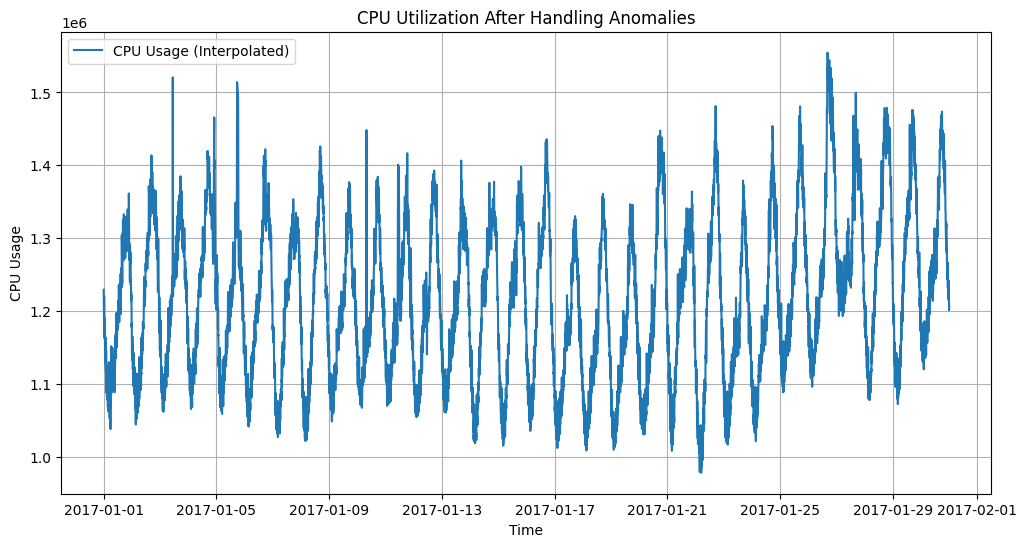

In [ ]:
# Interpolating anomalies
df['avg_cpu'] = np.where(df['anomaly'] == True, np.nan, df['avg_cpu'])
df['avg_cpu'] = df['avg_cpu'].interpolate(method='time')

# Drop the anomaly column as it's no longer needed
df = df.drop(columns=['anomaly'])

# Plot the data after interpolation
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['avg_cpu'], label='CPU Usage (Interpolated)')
plt.title('CPU Utilization After Handling Anomalies')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.legend()
plt.grid(True)
plt.show()

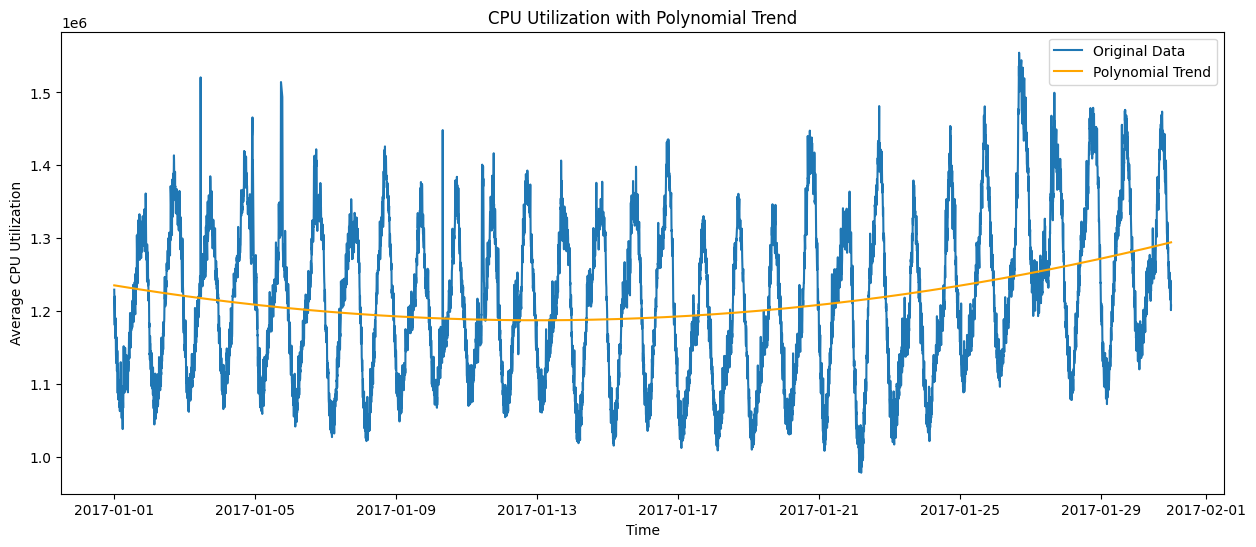

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Convert the time index to numerical values (e.g., the number of minutes since the start)
time_numeric = np.arange(len(df)).reshape(-1, 1)

# Define the degree of the polynomial
degree = 2  # You can experiment with different degrees

# Create polynomial features
poly = PolynomialFeatures(degree=degree)
time_poly = poly.fit_transform(time_numeric)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(time_poly, df['avg_cpu'])

# Predict the trend
trend = model.predict(time_poly)
df['trend'] = trend

# Plot the original data and the polynomial trend
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['avg_cpu'], label='Original Data')
plt.plot(df.index, df['trend'], label='Polynomial Trend', color='orange')
plt.title('CPU Utilization with Polynomial Trend')
plt.xlabel('Time')
plt.ylabel('Average CPU Utilization')
plt.legend()
plt.show()


In [ ]:
# Set seeds for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

# Function to create Fourier series
def create_fourier_series(df, period, order):
    t = np.arange(len(df))
    for k in range(1, order + 1):
        df[f'sin_{period}_{k}'] = np.sin(2 * np.pi * k * t / period)
        df[f'cos_{period}_{k}'] = np.cos(2 * np.pi * k * t / period)
    return df

df = create_fourier_series(df, period=24, order=3)
df = create_fourier_series(df, period=24 * 7, order=3)

# Add trend feature
df['trend'] = trend

# Add more lag features
max_lag = 36
for lag in range(1, max_lag + 1):
    df[f'avg_cpu_lag_{lag}'] = df['avg_cpu'].shift(lag)
df.dropna(inplace=True)

# Normalize the features and target separately
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

features = feature_scaler.fit_transform(df.drop(columns=['avg_cpu']))
target = target_scaler.fit_transform(df['avg_cpu'].values.reshape(-1, 1)).reshape(-1)

# Function to create sliding windows with features
def create_sliding_windows_with_features(data, target, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(target[i+window_size])
    return np.array(X), np.array(y)

window_size = 50
X, y = create_sliding_windows_with_features(features, target, window_size)

# Split the data into training, validation, and testing sets
total_samples = len(X)
train_size = int(total_samples * 0.7)
val_size = int(total_samples * 0.2)
test_size = total_samples - train_size - val_size

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]

In [ ]:
# Calculate the average of the original y values for train, validation, and test sets
train_indices = range(train_size)
val_indices = range(train_size, train_size + val_size)
test_indices = range(train_size + val_size, total_samples)

avg_y_train_raw = df['avg_cpu'].iloc[train_indices].mean()
avg_y_val_raw = df['avg_cpu'].iloc[val_indices].mean()
avg_y_test_raw = df['avg_cpu'].iloc[test_indices].mean()

print(f'Average of original y_train: {avg_y_train_raw}')
print(f'Average of original y_val: {avg_y_val_raw}')
print(f'Average of original y_test: {avg_y_test_raw}')


Average of original y_train: 1201931.9970080282
Average of original y_val: 1232839.47914023
Average of original y_test: 1272828.3604776547


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model
model = Sequential([
    LSTM(64, input_shape=(window_size, X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0136 - val_loss: 0.0034
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.0055 - val_loss: 0.0027
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0053 - val_loss: 0.0025
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0040 - val_loss: 0.0022
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0037 - val_loss: 0.0022
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0041 - val_loss: 0.0021
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0040 - val_loss: 0.0020
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0035 - val_loss: 0.0018
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.0030 - val_loss: 0.0021
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0028 - val_loss: 0.0018
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 0.0029 - val_loss: 0.0018
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━

188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Train MAE: 12233.232194789945, Train MAPE: 0.010111060087713225, Train Accuracy: 0.9898889399122868
Validation MAE: 15540.398561853186, Validation MAPE: 0.012376625785698361, Validation Accuracy: 0.9876233742143017
Test MAE: 13782.011735534728, Test MAPE: 0.01067500815666239, Test Accuracy: 0.9893249918433377


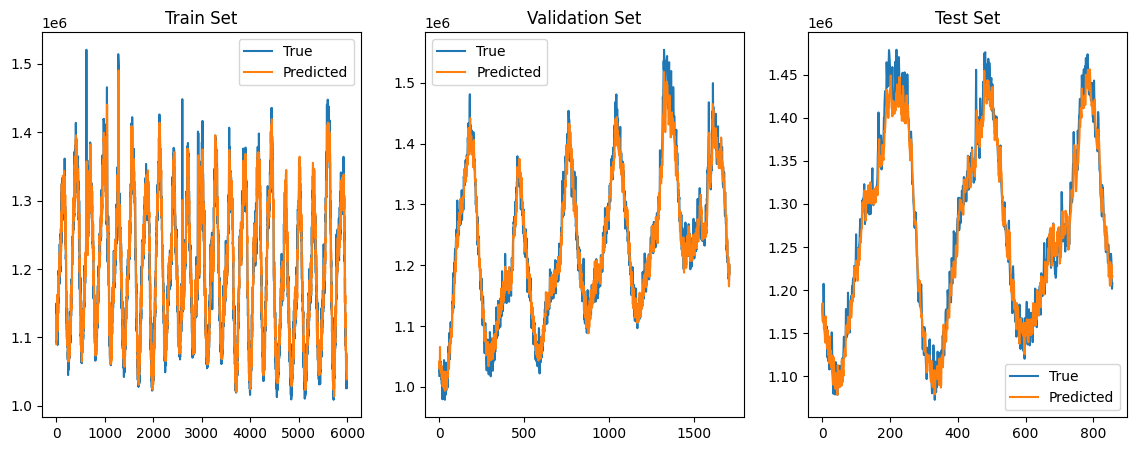

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Predict and inverse transform the predictions
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

y_train_true = target_scaler.inverse_transform(y_train.reshape(-1, 1))
y_val_true = target_scaler.inverse_transform(y_val.reshape(-1, 1))
y_test_true = target_scaler.inverse_transform(y_test.reshape(-1, 1))

y_train_pred = target_scaler.inverse_transform(y_train_pred)
y_val_pred = target_scaler.inverse_transform(y_val_pred)
y_test_pred = target_scaler.inverse_transform(y_test_pred)

# Calculate MAE, MAPE, and accuracy
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    accuracy = 1 - mape
    return mae, mape, accuracy

train_mae, train_mape, train_accuracy = calculate_metrics(y_train_true, y_train_pred)
val_mae, val_mape, val_accuracy = calculate_metrics(y_val_true, y_val_pred)
test_mae, test_mape, test_accuracy = calculate_metrics(y_test_true, y_test_pred)
S
# Print the metrics
print(f'Train MAE: {train_mae}, Train MAPE: {train_mape}, Train Accuracy: {train_accuracy}')
print(f'Validation MAE: {val_mae}, Validation MAPE: {val_mape}, Validation Accuracy: {val_accuracy}')
print(f'Test MAE: {test_mae}, Test MAPE: {test_mape}, Test Accuracy: {test_accuracy}')

# Plot the results
plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
plt.plot(y_train_true, label='True')
plt.plot(y_train_pred, label='Predicted')
plt.title('Train Set')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(y_val_true, label='True')
plt.plot(y_val_pred, label='Predicted')
plt.title('Validation Set')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(y_test_true, label='True')
plt.plot(y_test_pred, label='Predicted')
plt.title('Test Set')
plt.legend()

plt.show()


# Hyperparameter tuning

In [ ]:
# Calculate MAE, MAPE, and accuracy
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    accuracy = 1 - mape
    return mae, mape, accuracy

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from kerastuner.tuners import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


# Define the model function
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units1', min_value=32, max_value=128, step=32),
                   input_shape=(window_size, X_train.shape[2]), return_sequences=True))
    model.add(Dropout(hp.Float('dropout1', min_value=0.2, max_value=0.4, step=0.1)))
    model.add(LSTM(units=hp.Int('units2', min_value=16, max_value=64, step=16), return_sequences=False))
    model.add(Dropout(hp.Float('dropout2', min_value=0.2, max_value=0.4, step=0.1)))
    model.add(Dense(1))
    model.compile(optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']),
                  loss='mse')
    return model

# Initialize the tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='cpu_utilization')

# Perform random search
tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model on the validation and test sets
y_val_pred_best = best_model.predict(X_val)
y_test_pred_best = best_model.predict(X_test)

y_val_pred_best = target_scaler.inverse_transform(y_val_pred_best)
y_test_pred_best = target_scaler.inverse_transform(y_test_pred_best)

y_val_true = target_scaler.inverse_transform(y_val.reshape(-1, 1))
y_test_true = target_scaler.inverse_transform(y_test.reshape(-1, 1))

val_mae_best, val_mape_best, val_accuracy_best = calculate_metrics(y_val_true, y_val_pred_best)
test_mae_best, test_mape_best, test_accuracy_best = calculate_metrics(y_test_true, y_test_pred_best)

print(f'Best Validation MAE: {val_mae_best}, Best Validation MAPE: {val_mape_best}, Best Validation Accuracy: {val_accuracy_best}')
print(f'Best Test MAE: {test_mae_best}, Best Test MAPE: {test_mape_best}, Best Test Accuracy: {test_accuracy_best}')

Reloading Tuner from my_dir/cpu_utilization/tuner0.json


27/27 [==============================] - 1s 20ms/step
Best Validation MAE: 15103.66871142737, Best Validation MAPE: 0.012144385010880008, Best Validation Accuracy: 0.98785561498912
Best Test MAE: 12961.780749332294, Best Test MAPE: 0.010148742674531521, Best Test Accuracy: 0.9898512573254685


In [ ]:
# Get the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print("Best Hyperparameters:")
print(f"Units for first LSTM layer: {best_hyperparameters.get('units1')}")
print(f"Dropout rate for first LSTM layer: {best_hyperparameters.get('dropout1')}")
print(f"Units for second LSTM layer: {best_hyperparameters.get('units2')}")
print(f"Dropout rate for second LSTM layer: {best_hyperparameters.get('dropout2')}")
print(f"Optimizer: {best_hyperparameters.get('optimizer')}")


Best Hyperparameters:
Units for first LSTM layer: 128
Dropout rate for first LSTM layer: 0.4
Units for second LSTM layer: 32
Dropout rate for second LSTM layer: 0.30000000000000004
Optimizer: adam


188/188 [==============================] - 4s 22ms/step


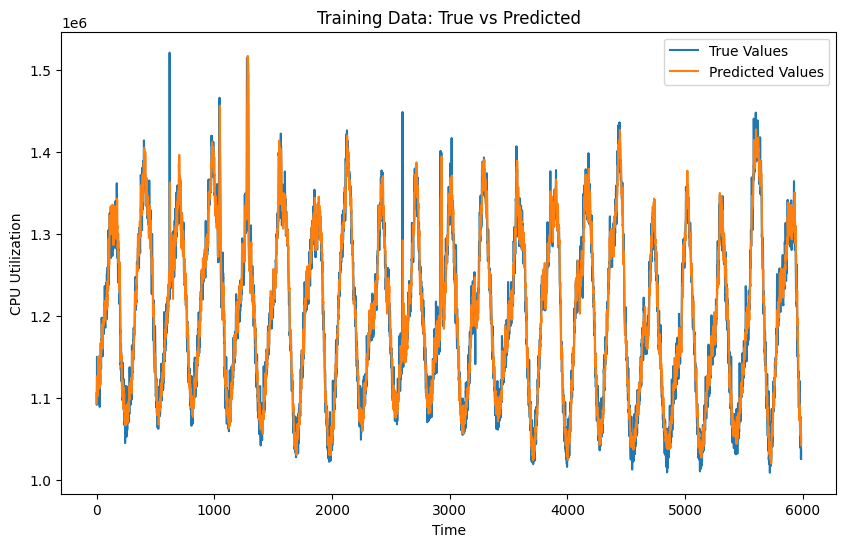

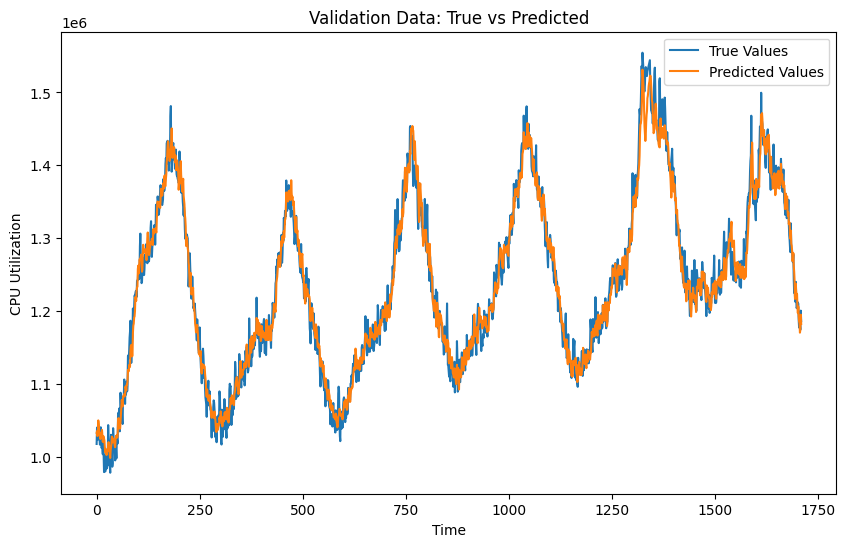

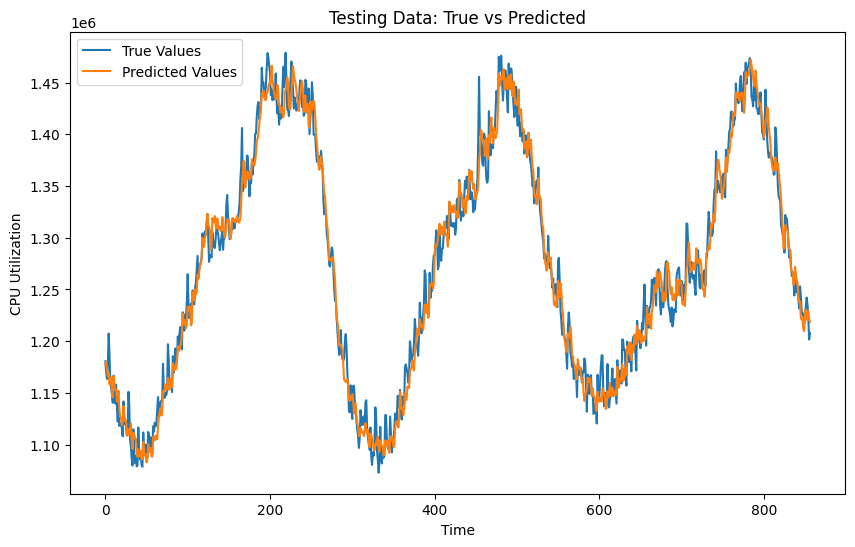

In [ ]:
# Predict on training data
y_train_pred_best = best_model.predict(X_train)
y_train_pred_best = target_scaler.inverse_transform(y_train_pred_best)
y_train_true = target_scaler.inverse_transform(y_train.reshape(-1, 1))

# Create a function to plot true vs predicted values
def plot_true_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.plot(y_true, label='True Values')
    plt.plot(y_pred, label='Predicted Values')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('CPU Utilization')
    plt.legend()
    plt.show()

# Plot training data
plot_true_vs_predicted(y_train_true, y_train_pred_best, 'Training Data: True vs Predicted')

# Plot validation data
plot_true_vs_predicted(y_val_true, y_val_pred_best, 'Validation Data: True vs Predicted')

# Plot testing data
plot_true_vs_predicted(y_test_true, y_test_pred_best, 'Testing Data: True vs Predicted')


Training MAE: 13165.588579408613, Training MAPE: 0.010877282862217544, Training Accuracy: 0.9891227171377824


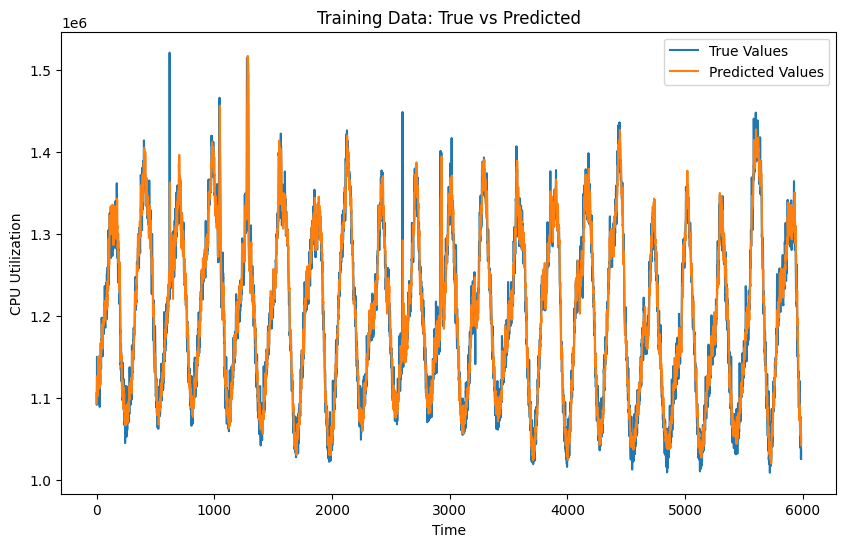

Validation MAE: 15103.66871142737, Validation MAPE: 0.012144385010880008, Validation Accuracy: 0.98785561498912


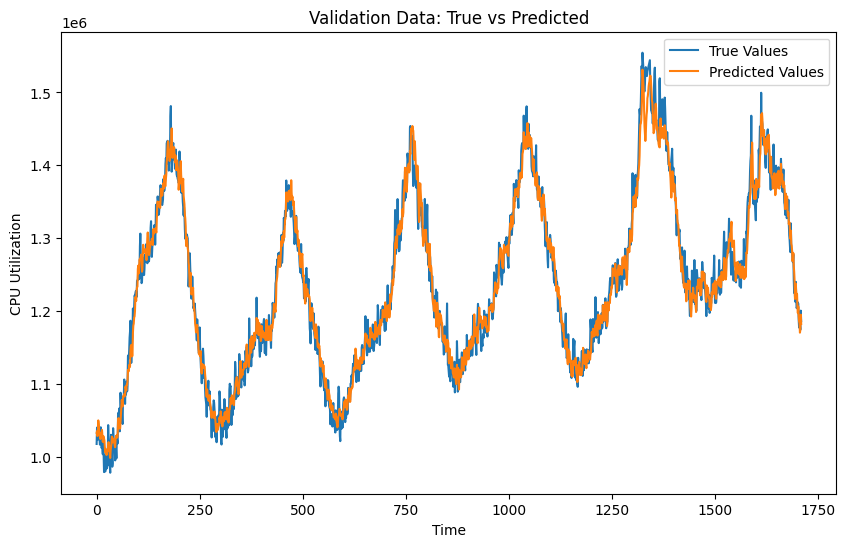

Test MAE: 12961.780749332294, Test MAPE: 0.010148742674531521, Test Accuracy: 0.9898512573254685


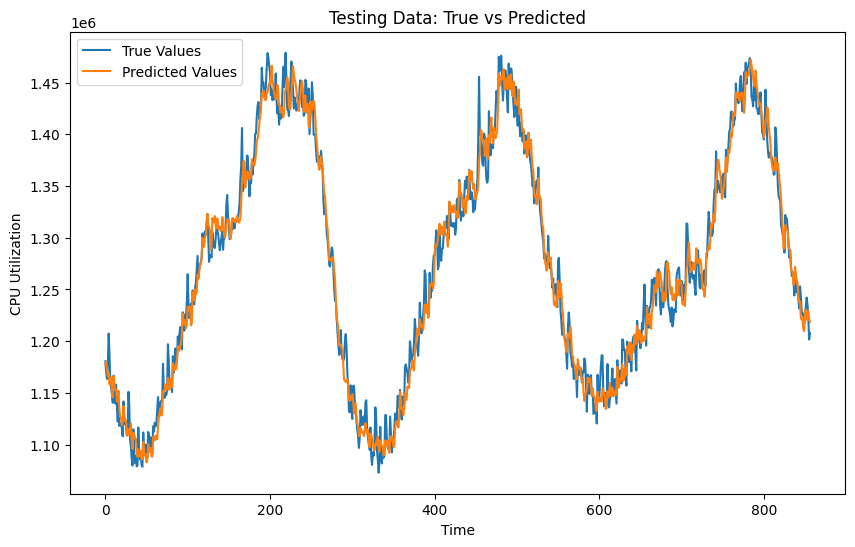

In [ ]:
# Calculate metrics for training data
train_mae_best, train_mape_best, train_accuracy_best = calculate_metrics(y_train_true, y_train_pred_best)
print(f'Training MAE: {train_mae_best}, Training MAPE: {train_mape_best}, Training Accuracy: {train_accuracy_best}')

# Plot training data
plot_true_vs_predicted(y_train_true, y_train_pred_best, 'Training Data: True vs Predicted')

# Calculate metrics for validation data
val_mae_best, val_mape_best, val_accuracy_best = calculate_metrics(y_val_true, y_val_pred_best)
print(f'Validation MAE: {val_mae_best}, Validation MAPE: {val_mape_best}, Validation Accuracy: {val_accuracy_best}')

# Plot validation data
plot_true_vs_predicted(y_val_true, y_val_pred_best, 'Validation Data: True vs Predicted')

# Calculate metrics for testing data
test_mae_best, test_mape_best, test_accuracy_best = calculate_metrics(y_test_true, y_test_pred_best)
print(f'Test MAE: {test_mae_best}, Test MAPE: {test_mape_best}, Test Accuracy: {test_accuracy_best}')

# Plot testing data
plot_true_vs_predicted(y_test_true, y_test_pred_best, 'Testing Data: True vs Predicted')

**Best Model Training**

In [ ]:
# Set seeds for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

# Function to create Fourier series
def create_fourier_series(df, period, order):
    t = np.arange(len(df))
    for k in range(1, order + 1):
        df[f'sin_{period}_{k}'] = np.sin(2 * np.pi * k * t / period)
        df[f'cos_{period}_{k}'] = np.cos(2 * np.pi * k * t / period)
    return df

df = create_fourier_series(df, period=24, order=3)
df = create_fourier_series(df, period=24 * 7, order=3)

# Add trend feature
df['trend'] = trend

# Add more lag features
max_lag = 36
for lag in range(1, max_lag + 1):
    df[f'avg_cpu_lag_{lag}'] = df['avg_cpu'].shift(lag)
df.dropna(inplace=True)

# Normalize the features and target separately
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

features = feature_scaler.fit_transform(df.drop(columns=['avg_cpu']))
target = target_scaler.fit_transform(df['avg_cpu'].values.reshape(-1, 1)).reshape(-1)

# Function to create sliding windows with features
def create_sliding_windows_with_features(data, target, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(target[i+window_size])
    return np.array(X), np.array(y)

window_size = 50
X, y = create_sliding_windows_with_features(features, target, window_size)

# Split the data into training, validation, and testing sets
total_samples = len(X)
train_size = int(total_samples * 0.7)
val_size = int(total_samples * 0.2)
test_size = total_samples - train_size - val_size

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define the LSTM model with the best hyperparameters
model = Sequential([
    LSTM(128, input_shape=(window_size, X_train.shape[2]), return_sequences=True),
    Dropout(0.4),
    LSTM(32, return_sequences=False),
    Dropout(0.3),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, callbacks=[early_stopping])

Epoch 1/50
188/188 [==============================] - 17s 76ms/step - loss: 0.0153 - val_loss: 0.0041
Epoch 2/50
188/188 [==============================] - 13s 69ms/step - loss: 0.0070 - val_loss: 0.0028
Epoch 3/50
188/188 [==============================] - 13s 68ms/step - loss: 0.0057 - val_loss: 0.0055
Epoch 4/50
188/188 [==============================] - 13s 69ms/step - loss: 0.0051 - val_loss: 0.0031
Epoch 5/50
188/188 [==============================] - 12s 63ms/step - loss: 0.0044 - val_loss: 0.0022
Epoch 6/50
188/188 [==============================] - 12s 63ms/step - loss: 0.0042 - val_loss: 0.0047
Epoch 7/50
188/188 [==============================] - 13s 70ms/step - loss: 0.0043 - val_loss: 0.0024
Epoch 8/50
188/188 [==============================] - 13s 67ms/step - loss: 0.0037 - val_loss: 0.0021
Epoch 9/50
188/188 [==============================] - 13s 69ms/step - loss: 0.0035 - val_loss: 0.0020
Epoch 10/50
188/188 [==============================] - 13s 70ms/step - loss: 0.003

27/27 [==============================] - 1s 20ms/step
Train MAE: 14294.627219426591, Train MAPE: 0.011879590907602032, Train Accuracy: 0.988120409092398
Validation MAE: 17950.193959009626, Validation MAPE: 0.014259056515291765, Validation Accuracy: 0.9857409434847082
Test MAE: 14702.540079422852, Test MAPE: 0.011299702651394768, Test Accuracy: 0.9887002973486052


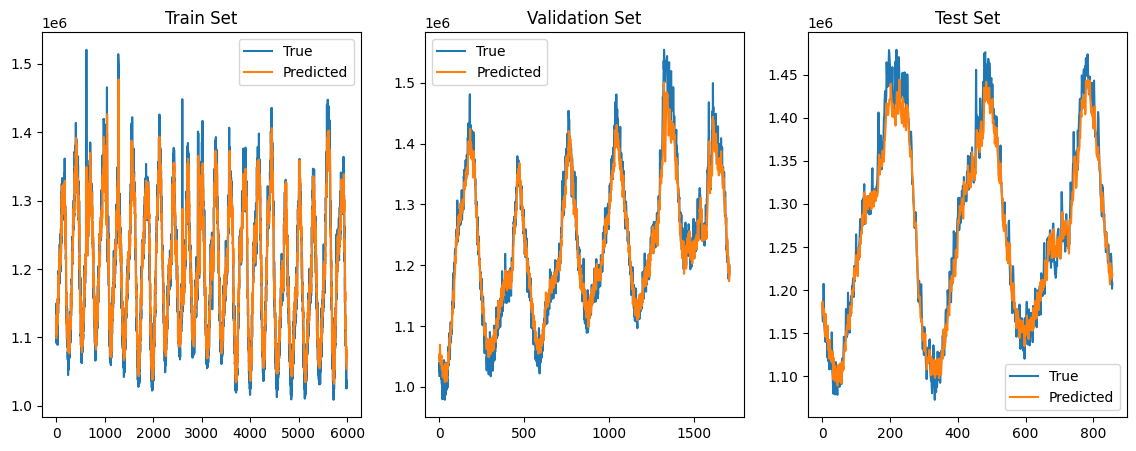

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Predict and inverse transform the predictions
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

y_train_true = target_scaler.inverse_transform(y_train.reshape(-1, 1))
y_val_true = target_scaler.inverse_transform(y_val.reshape(-1, 1))
y_test_true = target_scaler.inverse_transform(y_test.reshape(-1, 1))

y_train_pred = target_scaler.inverse_transform(y_train_pred)
y_val_pred = target_scaler.inverse_transform(y_val_pred)
y_test_pred = target_scaler.inverse_transform(y_test_pred)

# Calculate MAE, MAPE, and accuracy
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    accuracy = 1 - mape
    return mae, mape, accuracy

train_mae, train_mape, train_accuracy = calculate_metrics(y_train_true, y_train_pred)
val_mae, val_mape, val_accuracy = calculate_metrics(y_val_true, y_val_pred)
test_mae, test_mape, test_accuracy = calculate_metrics(y_test_true, y_test_pred)

# Print the metrics
print(f'Train MAE: {train_mae}, Train MAPE: {train_mape}, Train Accuracy: {train_accuracy}')
print(f'Validation MAE: {val_mae}, Validation MAPE: {val_mape}, Validation Accuracy: {val_accuracy}')
print(f'Test MAE: {test_mae}, Test MAPE: {test_mape}, Test Accuracy: {test_accuracy}')

# Plot the results
plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
plt.plot(y_train_true, label='True')
plt.plot(y_train_pred, label='Predicted')
plt.title('Train Set')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(y_val_true, label='True')
plt.plot(y_val_pred, label='Predicted')
plt.title('Validation Set')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(y_test_true, label='True')
plt.plot(y_test_pred, label='Predicted')
plt.title('Test Set')
plt.legend()

plt.show()


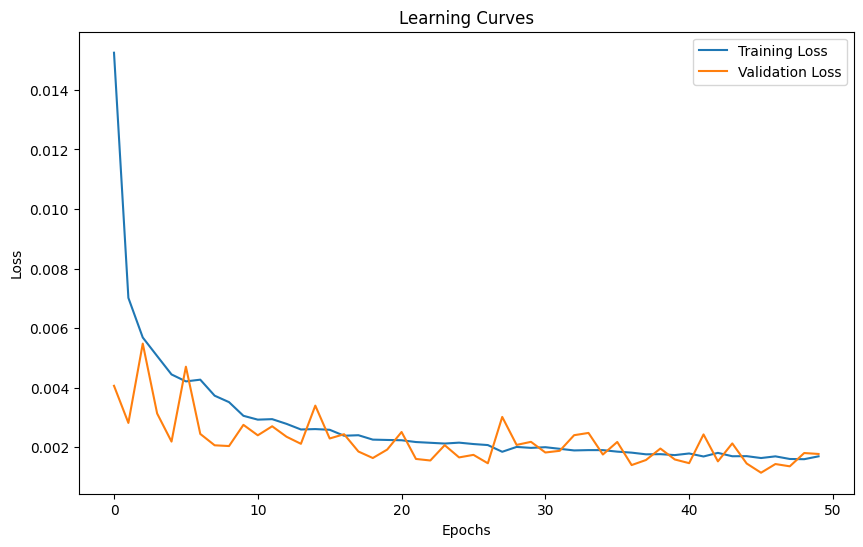

In [ ]:
# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

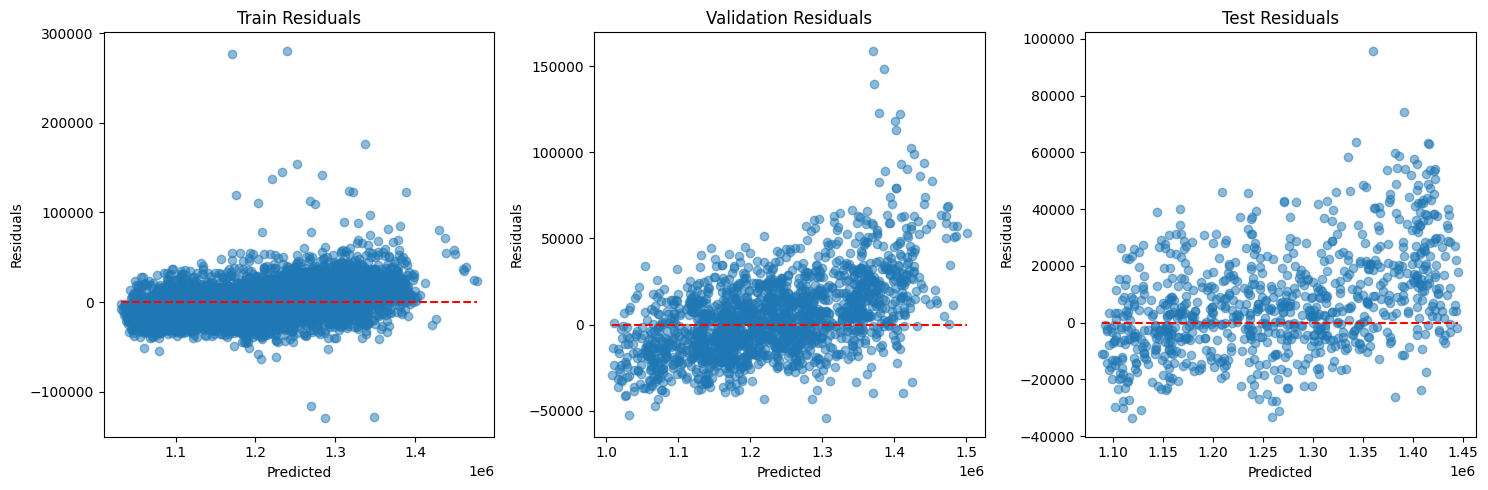

In [ ]:
# Residual Analysis
train_residuals = y_train_true - y_train_pred
val_residuals = y_val_true - y_val_pred
test_residuals = y_test_true - y_test_pred

# Plot residuals
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_train_pred, train_residuals, alpha=0.5)
plt.hlines(0, min(y_train_pred), max(y_train_pred), colors='r', linestyles='dashed')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Train Residuals')

plt.subplot(1, 3, 2)
plt.scatter(y_val_pred, val_residuals, alpha=0.5)
plt.hlines(0, min(y_val_pred), max(y_val_pred), colors='r', linestyles='dashed')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Validation Residuals')

plt.subplot(1, 3, 3)
plt.scatter(y_test_pred, test_residuals, alpha=0.5)
plt.hlines(0, min(y_test_pred), max(y_test_pred), colors='r', linestyles='dashed')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Test Residuals')

plt.tight_layout()
plt.show()

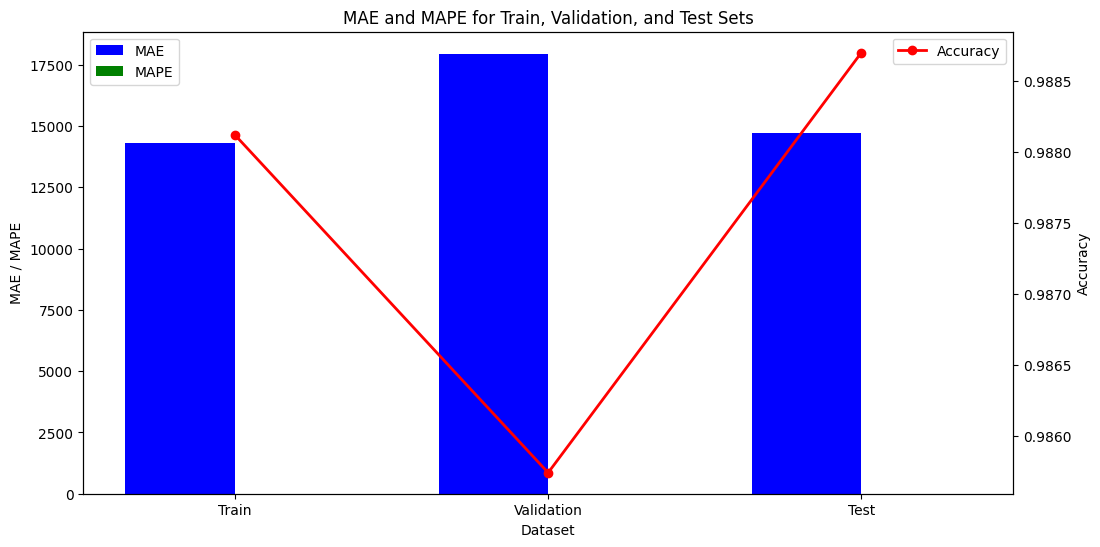

In [ ]:
# Bar plot for MAE, MAPE, and Accuracy
metrics = ['Train', 'Validation', 'Test']
mae_values = [train_mae, val_mae, test_mae]
mape_values = [train_mape, val_mape, test_mape]
accuracy_values = [train_accuracy, val_accuracy, test_accuracy]

x = np.arange(len(metrics))

fig, ax1 = plt.subplots(figsize=(12, 6))

# Create bars for MAE and MAPE
bar_width = 0.35
bar1 = ax1.bar(x - bar_width/2, mae_values, bar_width, label='MAE', color='b')
bar2 = ax1.bar(x + bar_width/2, mape_values, bar_width, label='MAPE', color='g')

# Add labels, title, and legend
ax1.set_xlabel('Dataset')
ax1.set_ylabel('MAE / MAPE')
ax1.set_title('MAE and MAPE for Train, Validation, and Test Sets')
ax1.set_xticks(x)
ax1.set_xticklabels(metrics)
ax1.legend(loc='upper left')

# Create a secondary y-axis for accuracy
ax2 = ax1.twinx()
ax2.plot(x, accuracy_values, label='Accuracy', color='r', marker='o', linewidth=2)
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper right')

plt.show()
